In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
data =pd.read_csv("layoffs_data.csv")

In [3]:
data

,Company,Location_HQ,Industry,Laid_Off_Count,Percentage,Date,Source,Funds_Raised,Stage,Date_Added,Country,List_of_Employees_Laid_Off
0,Opendoor,SF Bay Area,Real Estate,560.0,0.22,2023-04-18,https://www.inman.com/2023/04/18/opendoor-lays...,1900.0,Post-IPO,2023-04-18 17:55:14,United States,Unknown
1,Culture Amp,Melbourne,HR,NaN,0.09,2023-04-18,https://www.cultureamp.com/company/announcemen...,257.0,Series F,2023-04-19 00:21:55,Australia,Unknown
2,Noon,Riyadh,Retail,NaN,0.10,2023-04-18,https://yourstory.com/ys-gulf/noon-lays-off-10...,NaN,Unknown,2023-04-19 00:23:39,Saudi Arabia,Unknown
3,Ten Square Games,Wrocław,Consumer,120.0,0.25,2023-04-17,https://economictimes.indiatimes.com/tech/tech...,NaN,Seed,2023-04-18 04:44:03,Poland,Unknown
4,Ynsect,Paris,Food,17.0,0.25,2023-04-17,https://pitchbook.com/news/articles/agtech-yns...,579.0,Series D,2023-04-18 04:45:17,France,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...
2503,HopSkipDrive,Los Angeles,Transportation,8.0,0.10,2020-03-13,https://layoffs.fyi/2020/04/02/hopskipdrive-la...,45.0,Unknown,2020-04-03 04:47:03,United States,Unknown
2504,Panda Squad,SF Bay Area,Consumer,6.0,0.75,2020-03-13,https://twitter.com/danielsinger/status/123854...,1.0,Seed,2020-04-17 00:12:49,United States,Unknown
2505,Tamara Mellon,Los Angeles,Retail,20.0,0.40,2020-03-12,https://layoffs.fyi/list/tamara-mellon/,90.0,Series C,2020-03-31 16:04:23,United States,Unknown
2506,EasyPost,Salt Lake City,Logistics,75.0,NaN,2020-03-11,https://www.bizjournals.com/louisville/news/20...,12.0,Series A,2020-03-31 13:21:54,United States,Unknown


In [4]:
data = data.drop(['Source','List_of_Employees_Laid_Off','Date_Added'],axis=1)
data.head()

,Company,Location_HQ,Industry,Laid_Off_Count,Percentage,Date,Funds_Raised,Stage,Country
0,Opendoor,SF Bay Area,Real Estate,560.0,0.22,2023-04-18,1900.0,Post-IPO,United States
1,Culture Amp,Melbourne,HR,NaN,0.09,2023-04-18,257.0,Series F,Australia
2,Noon,Riyadh,Retail,NaN,0.10,2023-04-18,NaN,Unknown,Saudi Arabia
3,Ten Square Games,Wrocław,Consumer,120.0,0.25,2023-04-17,NaN,Seed,Poland
4,Ynsect,Paris,Food,17.0,0.25,2023-04-17,579.0,Series D,France


In [5]:
data.isnull().sum()

Company             0
Location_HQ         0
Industry            0
Laid_Off_Count    792
Percentage        845
Date                1
Funds_Raised      241
Stage               0
Country             0
dtype: int64

In [6]:
df = data.fillna(0)
df

,Company,Location_HQ,Industry,Laid_Off_Count,Percentage,Date,Funds_Raised,Stage,Country
0,Opendoor,SF Bay Area,Real Estate,560.0,0.22,2023-04-18,1900.0,Post-IPO,United States
1,Culture Amp,Melbourne,HR,0.0,0.09,2023-04-18,257.0,Series F,Australia
2,Noon,Riyadh,Retail,0.0,0.10,2023-04-18,0.0,Unknown,Saudi Arabia
3,Ten Square Games,Wrocław,Consumer,120.0,0.25,2023-04-17,0.0,Seed,Poland
4,Ynsect,Paris,Food,17.0,0.25,2023-04-17,579.0,Series D,France
...,...,...,...,...,...,...,...,...,...
2503,HopSkipDrive,Los Angeles,Transportation,8.0,0.10,2020-03-13,45.0,Unknown,United States
2504,Panda Squad,SF Bay Area,Consumer,6.0,0.75,2020-03-13,1.0,Seed,United States
2505,Tamara Mellon,Los Angeles,Retail,20.0,0.40,2020-03-12,90.0,Series C,United States
2506,EasyPost,Salt Lake City,Logistics,75.0,0.00,2020-03-11,12.0,Series A,United States


In [7]:
df.isnull().sum()

Company           0
Location_HQ       0
Industry          0
Laid_Off_Count    0
Percentage        0
Date              0
Funds_Raised      0
Stage             0
Country           0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2508 entries, 0 to 2507
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Company         2508 non-null   object 
 1   Location_HQ     2508 non-null   object 
 2   Industry        2508 non-null   object 
 3   Laid_Off_Count  2508 non-null   float64
 4   Percentage      2508 non-null   float64
 5   Date            2508 non-null   object 
 6   Funds_Raised    2508 non-null   float64
 7   Stage           2508 non-null   object 
 8   Country         2508 non-null   object 
dtypes: float64(3), object(6)
memory usage: 176.5+ KB


In [9]:
df.describe()

,Laid_Off_Count,Percentage,Funds_Raised
count,2508.000000,2508.000000,2508.000000
mean,172.703349,0.172922,739.287199
std,694.301230,0.244185,5218.268476
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,29.000000
50%,40.000000,0.100000,122.000000
75%,110.000000,0.220000,382.250000
max,12000.000000,1.000000,121900.000000


In [10]:
grouped = df.groupby(by = "Country").mean() 
grouped = df.groupby(by = "Company").mean()
grouped = df.groupby(by = "Location_HQ").mean()
grouped = df.groupby(by = "Industry").mean()

<AxesSubplot:>

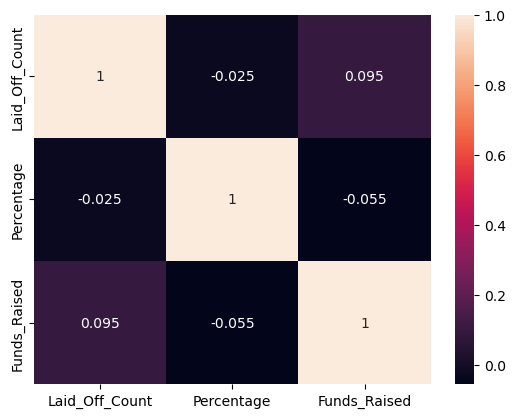

In [11]:
import seaborn as sns
sns.heatmap(df.corr(),  annot = True)

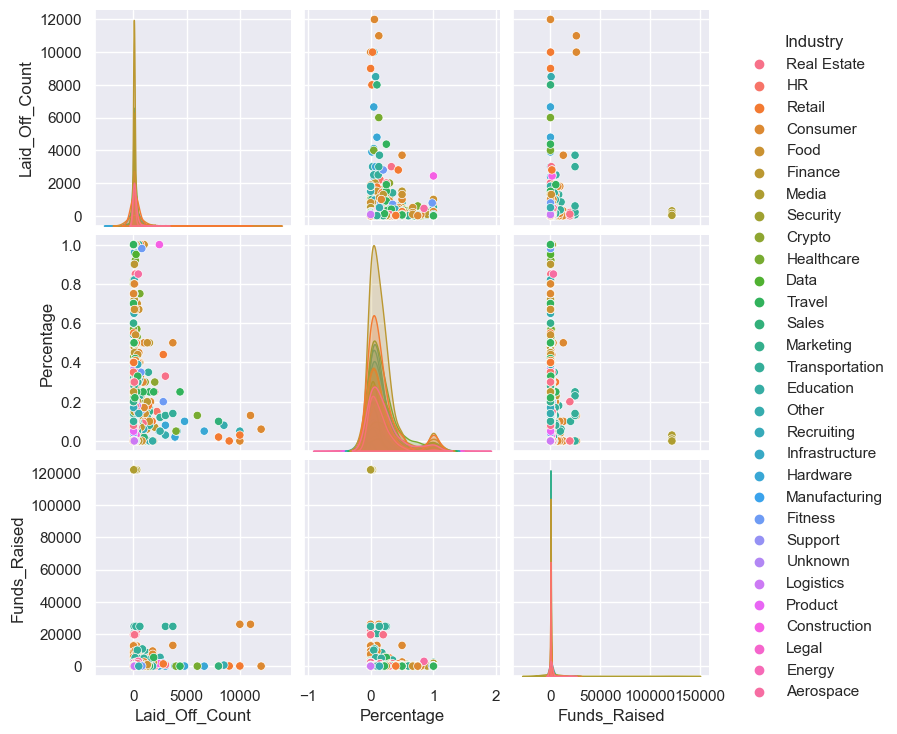

In [12]:
sns.set_theme(style = "darkgrid")
sns.pairplot(df, hue ="Industry")

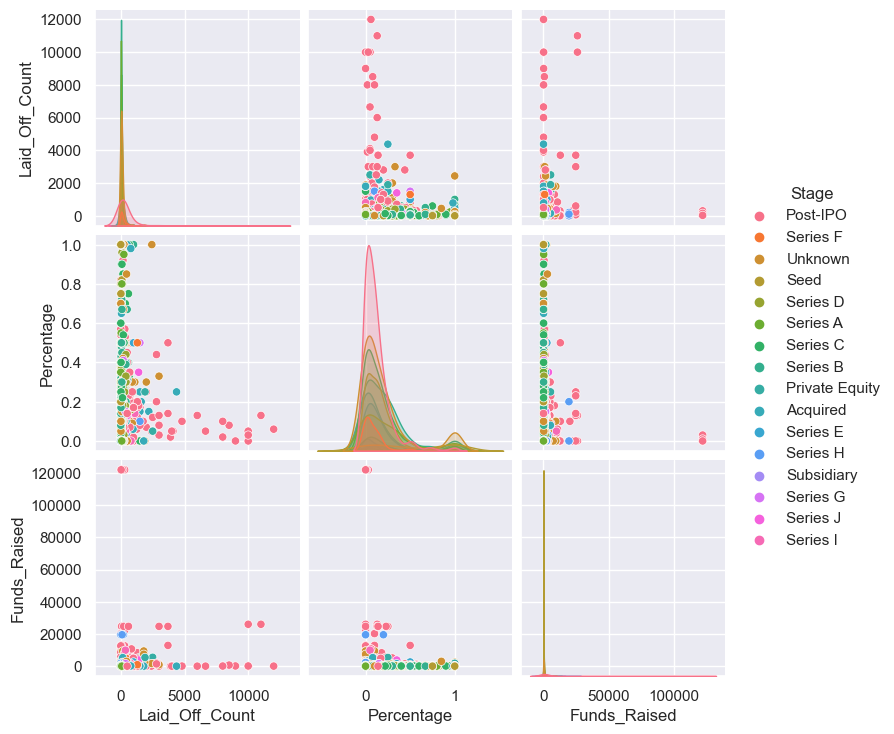

In [13]:
sns.set_theme(style = "darkgrid")
sns.pairplot(df, hue = "Stage")

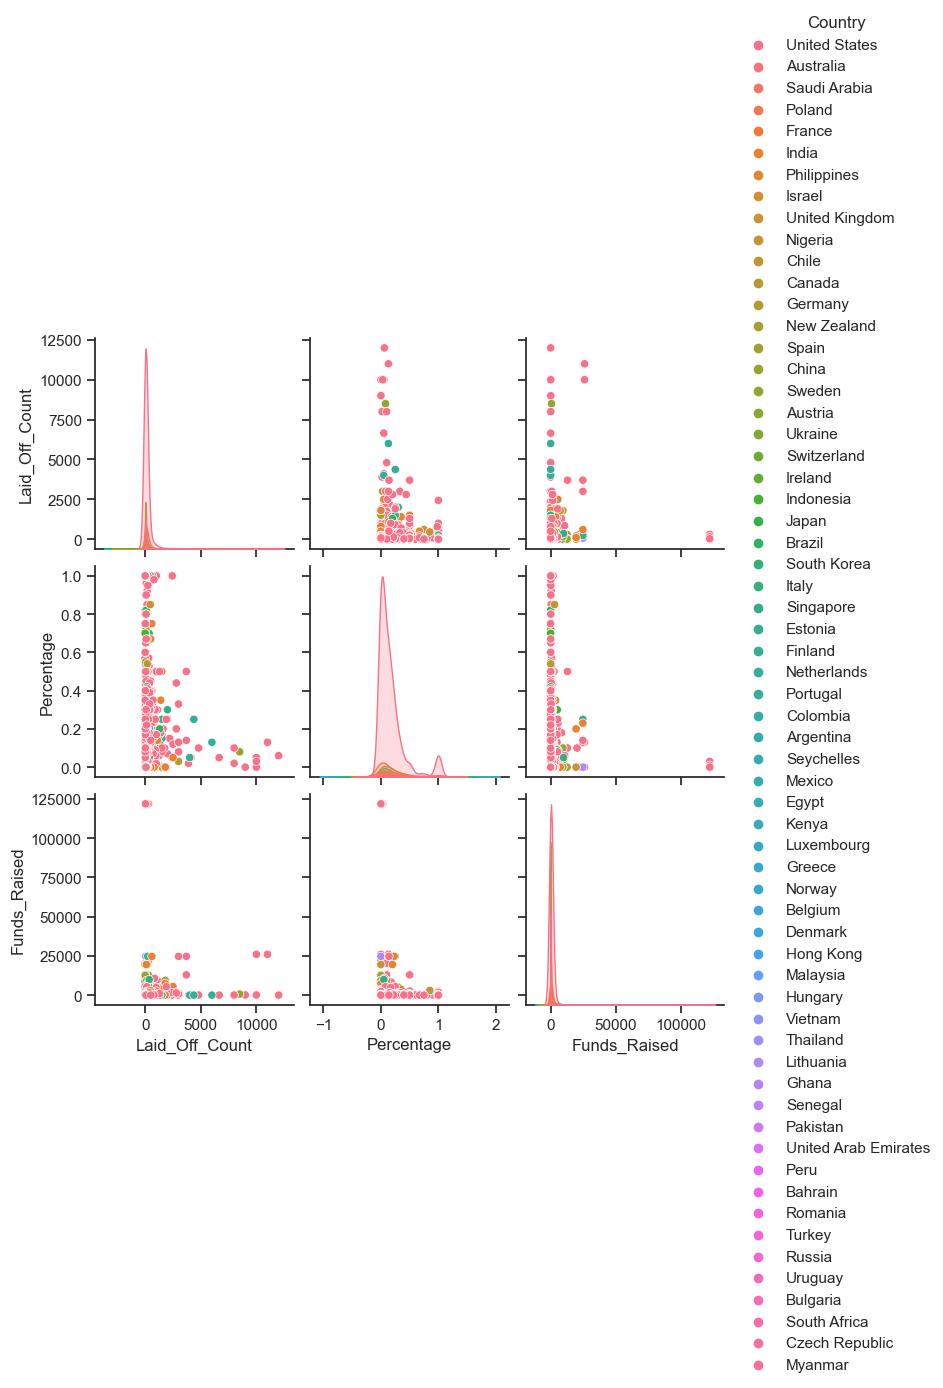

In [14]:
sns.set_theme(style = "ticks")
sns.pairplot(df, hue = "Country")

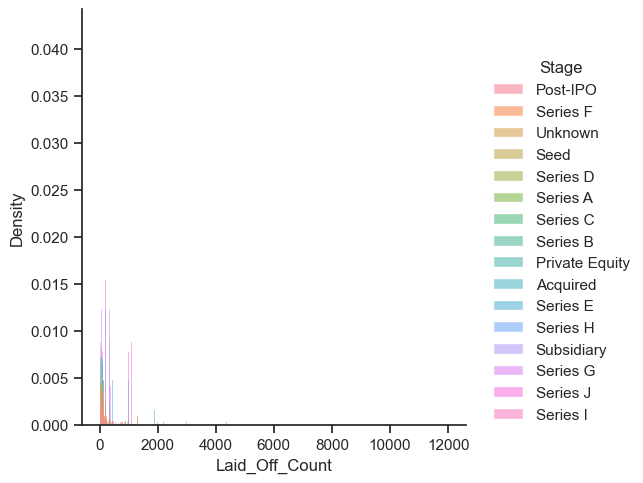

In [15]:
sns.displot(df, x= "Laid_Off_Count",  hue = "Stage", stat = "density", common_norm = False )

In [16]:
df.value_counts().sum()

2508

In [17]:
numerical_cols = df._get_numeric_data().columns
categorical_cols = list(set(df.columns)-set(numerical_cols))
categorical_cols

['Country', 'Location_HQ', 'Date', 'Stage', 'Industry', 'Company']

In [18]:
df_new = df.drop('Date', axis =1)
df_new = df_new.drop("Company", axis = 1) 
df_new

,Location_HQ,Industry,Laid_Off_Count,Percentage,Funds_Raised,Stage,Country
0,SF Bay Area,Real Estate,560.0,0.22,1900.0,Post-IPO,United States
1,Melbourne,HR,0.0,0.09,257.0,Series F,Australia
2,Riyadh,Retail,0.0,0.10,0.0,Unknown,Saudi Arabia
3,Wrocław,Consumer,120.0,0.25,0.0,Seed,Poland
4,Paris,Food,17.0,0.25,579.0,Series D,France
...,...,...,...,...,...,...,...
2503,Los Angeles,Transportation,8.0,0.10,45.0,Unknown,United States
2504,SF Bay Area,Consumer,6.0,0.75,1.0,Seed,United States
2505,Los Angeles,Retail,20.0,0.40,90.0,Series C,United States
2506,Salt Lake City,Logistics,75.0,0.00,12.0,Series A,United States


In [19]:
df_new["Stage"].unique()

array(['Post-IPO', 'Series F', 'Unknown', 'Seed', 'Series D', 'Series A',
       'Series C', 'Series B', 'Private Equity', 'Acquired', 'Series E',
       'Series H', 'Subsidiary', 'Series G', 'Series J', 'Series I'],
      dtype=object)

In [20]:
stage_mapping = {stage: index+1 for index, stage in enumerate(df_new["Stage"].unique())}
df_new["Stage"] = df_new["Stage"].replace(stage_mapping)

df_new["Stage"].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16],
      dtype=int64)

In [21]:
df_new['Country'].unique()

array(['United States', 'Australia', 'Saudi Arabia', 'Poland', 'France',
       'India', 'Philippines', 'Israel', 'United Kingdom', 'Nigeria',
       'Chile', 'Canada', 'Germany', 'New Zealand', 'Spain', 'China',
       'Sweden', 'Austria', 'Ukraine', 'Switzerland', 'Ireland',
       'Indonesia', 'Japan', 'Brazil', 'South Korea', 'Italy',
       'Singapore', 'Estonia', 'Finland', 'Netherlands', 'Portugal',
       'Colombia', 'Argentina', 'Seychelles', 'Mexico', 'Egypt', 'Kenya',
       'Luxembourg', 'Greece', 'Norway', 'Belgium', 'Denmark',
       'Hong Kong', 'Malaysia', 'Hungary', 'Vietnam', 'Thailand',
       'Lithuania', 'Ghana', 'Senegal', 'Pakistan',
       'United Arab Emirates', 'Peru', 'Bahrain', 'Romania', 'Turkey',
       'Russia', 'Uruguay', 'Bulgaria', 'South Africa', 'Czech Republic',
       'Myanmar'], dtype=object)

In [22]:
df_new["Country"] = df_new["Country"].replace({'United States':1, 'Australia':2, 'Saudi Arabia':3, 'Poland':4, 'France':5,
       'India':6, 'Philippines':7, 'Israel':8, 'United Kingdom':9, 'Nigeria':10,
       'Chile':11, 'Canada':12, 'Germany':13, 'New Zealand':14, 'Spain':15, 'China':16,
       'Sweden':17, 'Austria':18, 'Ukraine':19, 'Switzerland':20, 'Ireland':21,
       'Indonesia':22, 'Japan':23, 'Brazil':24, 'South Korea':25, 'Italy':26,
       'Singapore':27, 'Estonia':28, 'Finland':29, 'Netherlands':30, 'Portugal':31,
       'Colombia':32, 'Argentina':33, 'Seychelles':34, 'Mexico':35, 'Egypt':36, 'Kenya':37,
       'Luxembourg':38, 'Greece':39, 'Norway':40, 'Belgium':41, 'Denmark':42,
       'Hong Kong':43, 'Malaysia':44, 'Hungary':45, 'Vietnam':46, 'Thailand':47,
       'Lithuania':48, 'Ghana':49, 'Senegal':50, 'Pakistan':51,
       'United Arab Emirates':52, 'Peru':53, 'Bahrain':54, 'Romania':55, 'Turkey':56,
       'Russia':57, 'Uruguay':58, 'Bulgaria':59, 'South Africa':60, 'Czech Republic':61,
       'Myanmar':62})
df_new["Country"].unique()


array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62], dtype=int64)

In [23]:
df_new["Industry"].unique()

array(['Real Estate', 'HR', 'Retail', 'Consumer', 'Food', 'Finance',
       'Media', 'Security', 'Crypto', 'Healthcare', 'Data', 'Travel',
       'Sales', 'Marketing', 'Transportation', 'Education', 'Other',
       'Recruiting', 'Infrastructure', 'Hardware', 'Manufacturing',
       'Fitness', 'Support', 'Unknown', 'Logistics', 'Product',
       'Construction', 'Legal', 'Energy', 'Aerospace'], dtype=object)

In [34]:
df_new["Industry"] = df_new["Industry"].replace({'Real Estate':1, 'HR':2, 'Retail':3, 'Consumer':4, 'Food':5, 'Finance':6,
       'Media':7, 'Security':8, 'Crypto':9, 'Healthcare':10, 'Data':11, 'Travel':12,
       'Sales':13, 'Marketing':14, 'Transportation':15, 'Education':16, 'Other':17,
       'Recruiting':18, 'Infrastructure':19, 'Hardware':20, 'Manufacturing':21,
       'Fitness':22, 'Support':23, 'Unknown':24, 'Logistics':25, 'Product':26,
       'Construction':27, 'Legal':28, 'Energy':29, 'Aerospace':30})

df_new["Industry"].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], dtype=int64)

In [35]:
df_new["Location_HQ"].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [36]:
location_mapping = {location: index+1 for index, location in enumerate(df_new["Location_HQ"].unique())}
df_new["Location_HQ"] = df_new["Location_HQ"].replace(location_mapping)

df_new["Location_HQ"].unique()


array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [37]:
df_new

,Location_HQ,Industry,Laid_Off_Count,Percentage,Funds_Raised,Stage,Country
0,1,1,560.0,0.22,1900.0,1,1
1,2,2,0.0,0.09,257.0,2,2
2,3,3,0.0,0.10,0.0,3,3
3,4,4,120.0,0.25,0.0,4,4
4,5,5,17.0,0.25,579.0,5,5
...,...,...,...,...,...,...,...
2503,35,15,8.0,0.10,45.0,3,1
2504,1,4,6.0,0.75,1.0,4,1
2505,35,3,20.0,0.40,90.0,7,1
2506,112,25,75.0,0.00,12.0,6,1


In [38]:
X = df_new.drop("Country", axis =1)
y = df_new.iloc[:,-1]
print(X.shape)
print(y.shape)

(2508, 6)
(2508,)


In [39]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2006, 6)
(502, 6)
(2006,)
(502,)


In [41]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)


DecisionTreeClassifier()

In [42]:
y_pred = dt.predict(X_test)
y_pred

array([13,  1,  1,  1,  1, 12,  9,  1,  1,  2, 24,  8,  1, 22,  1,  6,  6,
        1, 24,  1,  1,  1,  1,  1,  1,  1, 10,  1,  1,  1,  1,  1,  1,  9,
        1,  6,  1,  1,  2,  1,  1, 44, 27, 22,  1,  1,  1,  6,  1,  8,  1,
        9, 12,  8,  1, 12,  1,  1, 13, 24,  1, 24,  1,  1,  1,  1,  1,  1,
        1,  2,  1,  6, 24,  1,  1, 24,  1, 29,  6,  1,  1,  1, 62,  4, 34,
        6,  9,  1,  6,  1,  1,  1,  1,  9,  1, 34,  1, 24,  1,  1,  1,  1,
        9, 12,  6,  1,  6,  1,  1,  1, 24,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, 16,  1,  2, 30,  1, 12,  1,  1, 13, 12,  1,  1,  6,  1,
        1, 10,  1,  2,  1, 24,  1,  1,  1,  1,  6,  1,  8,  1, 12,  6,  1,
        1,  1,  1,  1,  2,  1, 12,  1,  1, 39,  1,  1, 13,  1,  1,  1,  1,
        1,  1,  1,  9,  1, 31, 24,  1, 12,  1, 12,  1,  1,  1,  1, 13,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  9,  1, 52, 58,  1, 24,  1,
        1,  1, 10,  9, 12,  1,  1,  1, 24,  1,  1,  1,  1,  1, 52, 24,  1,
        8,  1,  1,  2,  1

In [43]:
y_pred = dt.predict(X_test)
y_pred

array([13,  1,  1,  1,  1, 12,  9,  1,  1,  2, 24,  8,  1, 22,  1,  6,  6,
        1, 24,  1,  1,  1,  1,  1,  1,  1, 10,  1,  1,  1,  1,  1,  1,  9,
        1,  6,  1,  1,  2,  1,  1, 44, 27, 22,  1,  1,  1,  6,  1,  8,  1,
        9, 12,  8,  1, 12,  1,  1, 13, 24,  1, 24,  1,  1,  1,  1,  1,  1,
        1,  2,  1,  6, 24,  1,  1, 24,  1, 29,  6,  1,  1,  1, 62,  4, 34,
        6,  9,  1,  6,  1,  1,  1,  1,  9,  1, 34,  1, 24,  1,  1,  1,  1,
        9, 12,  6,  1,  6,  1,  1,  1, 24,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, 16,  1,  2, 30,  1, 12,  1,  1, 13, 12,  1,  1,  6,  1,
        1, 10,  1,  2,  1, 24,  1,  1,  1,  1,  6,  1,  8,  1, 12,  6,  1,
        1,  1,  1,  1,  2,  1, 12,  1,  1, 39,  1,  1, 13,  1,  1,  1,  1,
        1,  1,  1,  9,  1, 31, 24,  1, 12,  1, 12,  1,  1,  1,  1, 13,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  9,  1, 52, 58,  1, 24,  1,
        1,  1, 10,  9, 12,  1,  1,  1, 24,  1,  1,  1,  1,  1, 52, 24,  1,
        8,  1,  1,  2,  1

In [44]:
y_pred_query= dt.predict([[1,2,1000.0,0.22,10000.0,2]])
y_pred_query

C:\Users\kapet\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

#### df_new.head()

In [45]:
y_pred_query= dt.predict([[1,1,560.0,0.20,1900.0,1]])
y_pred_query

C:\Users\kapet\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [46]:
df_new.head()

,Location_HQ,Industry,Laid_Off_Count,Percentage,Funds_Raised,Stage,Country
0,1,1,560.0,0.22,1900.0,1,1
1,2,2,0.0,0.09,257.0,2,2
2,3,3,0.0,0.10,0.0,3,3
3,4,4,120.0,0.25,0.0,4,4
4,5,5,17.0,0.25,579.0,5,5


In [47]:
y_test

641     1
1104    1
182     1
1058    1
2267    1
       ..
1956    1
2485    1
1156    1
23      6
952     8
Name: Country, Length: 502, dtype: int64

Text(0.5, 1.0, 'decision tree')

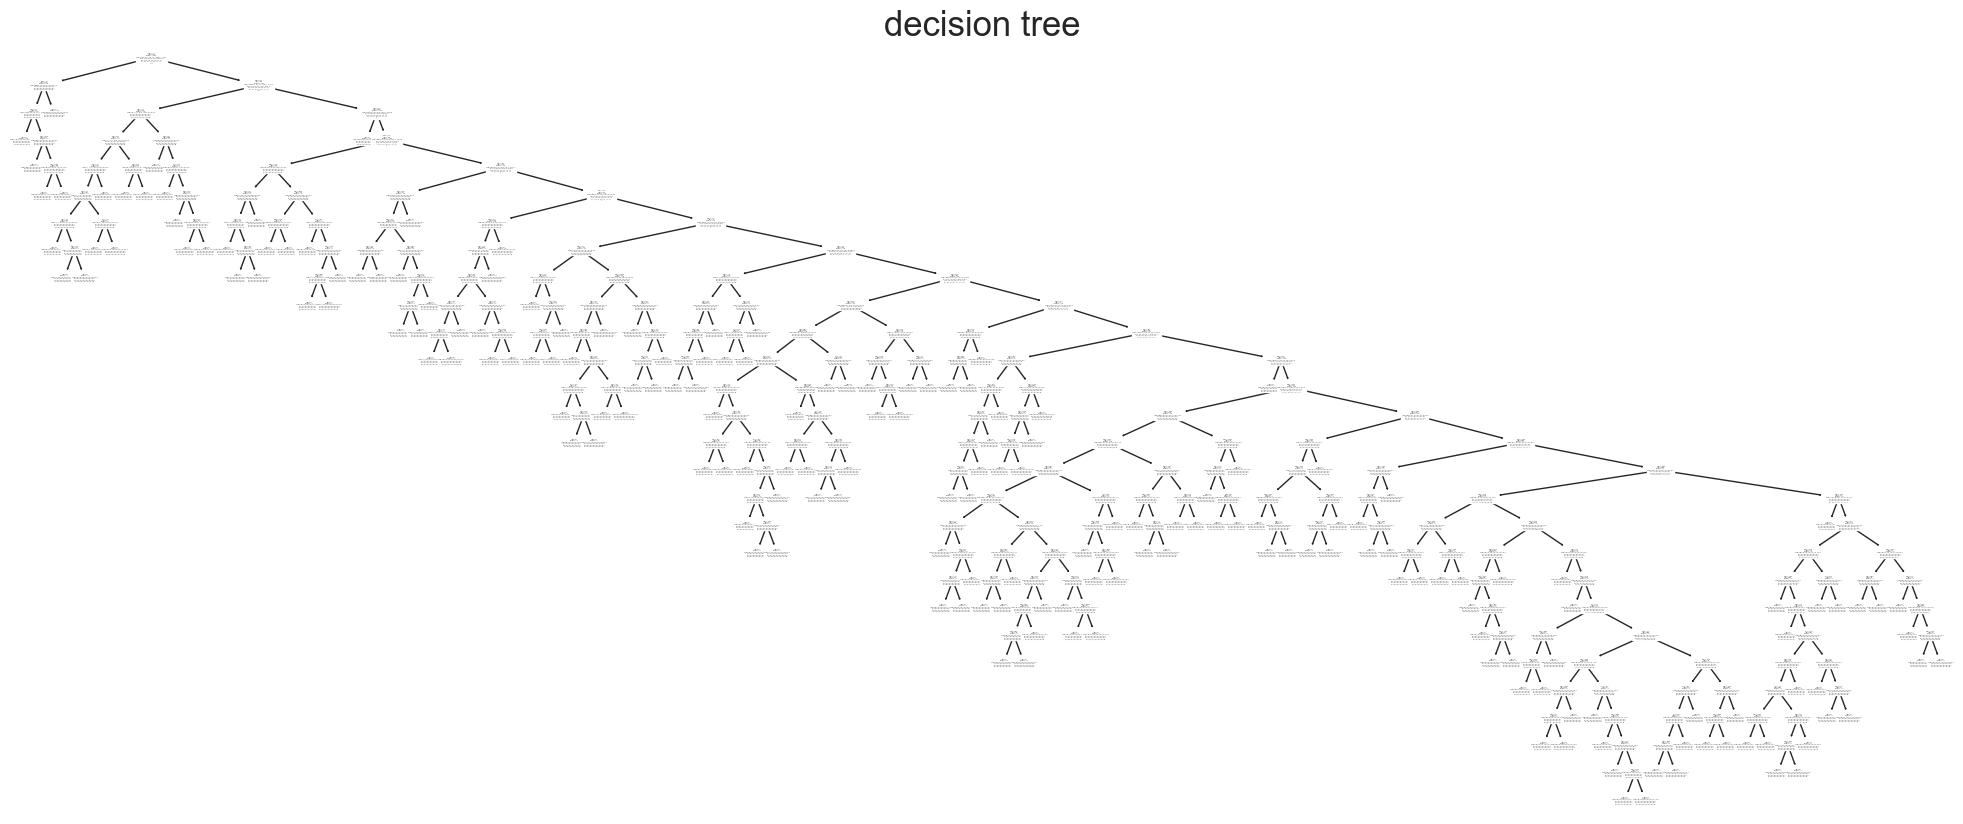

In [48]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize = (25,10))
plot_tree(dt)
plt.title("decision tree", fontsize = 25)

In [49]:
from sklearn.metrics import accuracy_score
print("decision tree accuracy is: {:.2f}".format(accuracy_score(y_test, y_pred)*100))

decision tree accuracy is: 90.64


In [50]:
bag = BaggingClassifier(n_estimators=100)
bag.fit(X_train, y_train)


BaggingClassifier(n_estimators=100)

In [51]:
y_pred_bag = bag.predict(X_test)
y_pred_bag

array([13,  1,  1,  1,  1, 12,  9,  1,  1,  2, 24,  1,  1, 22,  1,  6,  6,
        1, 24,  1,  1,  1,  1,  1,  1,  1, 10,  1,  1,  1, 12,  1,  1,  9,
        1,  6,  1,  1,  2,  1,  1, 44, 27, 22,  1,  1,  1,  6,  1,  8,  1,
        9, 12,  8,  1, 12,  1,  1, 13, 24,  1, 24,  1,  1,  1,  1,  1,  1,
        1,  2,  1,  9,  1,  1,  1,  1,  1, 29,  6,  1,  1,  1,  1,  6,  1,
        6,  9,  1,  6,  1,  1,  1,  1,  9,  1,  1,  1,  1,  1,  1,  1,  1,
        9, 12,  6,  1,  6,  1,  1,  1, 24,  1,  1,  1,  1, 12,  1,  1,  1,
        1,  1,  1, 16,  1,  2, 30,  1,  6,  1,  1, 13, 12,  1,  1,  6,  1,
        1, 10,  1,  2,  1, 24,  1,  2,  1,  1,  6,  1,  1,  1, 12, 34,  1,
        1,  1,  1, 12,  2,  1, 12,  1,  1,  4,  1,  1, 13,  1,  1,  1,  1,
        1,  1,  1,  9,  1,  1, 24,  1, 12,  1, 12,  1,  1,  1,  1, 13,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  9,  1, 52,  1,  1, 24,  1,
        1,  1, 10,  9, 12,  1,  1,  1, 24,  1,  1,  1,  1,  1, 52, 24,  1,
        8,  1,  1,  2,  1

In [52]:
print("Bagging accuracy score:{:.2f}".format(accuracy_score(y_test, y_pred_bag)*100))

Bagging accuracy score:92.03


In [53]:
rand = RandomForestClassifier()
rand.fit(X_train, y_train)

RandomForestClassifier()

In [54]:
y_pred_rand = rand.predict(X_test)
y_pred_rand


array([13,  1,  1,  1,  1,  1,  9,  1,  1,  2, 24,  1,  1,  1,  1,  1,  6,
        1,  6,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  9,
        1,  6,  1,  1,  1,  1,  1, 44,  1,  1,  1,  1,  1,  6,  1,  8,  1,
        9,  1,  8,  1, 12,  1,  1, 13, 24,  1, 24,  1,  1,  1,  1,  1,  1,
        1,  2,  1,  1, 24,  1,  1, 12,  1,  1,  6,  1,  1,  1,  1,  1,  1,
        6,  1,  1,  6,  1,  1,  1,  1,  9,  1,  1,  1,  1,  1,  1,  1,  1,
        9, 12,  1,  1,  6,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  2,  1,  1, 12,  1,  1,  1,  1,  1,  1,  6,  1,
        1, 10,  1,  2,  1,  1,  1,  6,  1,  1,  6,  1,  1,  1,  1, 38,  1,
        1,  1,  1,  1,  1,  1, 12,  1,  1,  1,  1,  1, 13,  1,  1,  1,  1,
        1,  1,  1,  9,  1,  1, 24,  1, 12,  1,  1,  1,  1,  1,  1, 13,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  9,  1,  1,  1,  1, 24,  1,
        1,  1, 10,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        8,  1,  1,  1,  1

In [55]:
print("random forest accuracy is: {:.2f}". format(accuracy_score(y_test, y_pred_rand)*100))

random forest accuracy is: 79.68


In [56]:
print("decision tree accuracy is: {:.2f}".format(accuracy_score(y_test, y_pred)*100))
print("Bagging accuracy score:{:.2f}".format(accuracy_score(y_test, y_pred_bag)*100))
print("random forest accuracy is: {:.2f}". format(accuracy_score(y_test, y_pred_rand)*100))


decision tree accuracy is: 90.64
Bagging accuracy score:92.03
random forest accuracy is: 79.68
